## FREDY ALEXANDER MENDEZ BUSTAMANTE COD:816539


# **Decomposition into Second-Order Sections**

**Example - Cascaded second-order section realization of a lowpass**

Coefficients of the recursive part 

['1.00', '-5.39', '13.38', '-19.96', '19.62', '-13.14', '5.97', '-1.78', '0.31', '-0.02']


Coefficients of the recursive part of the individual SOS 

Section 	 a1 		 a2
0 		 -0.50953 	 0.00000
1 		 -1.04232 	 0.28838
2 		 -1.11568 	 0.37905
3 		 -1.25052 	 0.54572
4 		 -1.46818 	 0.81477


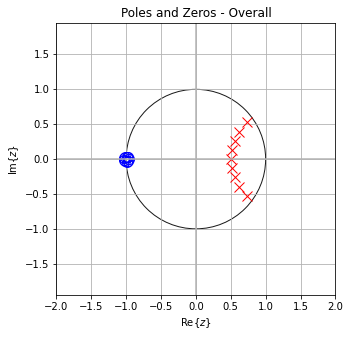

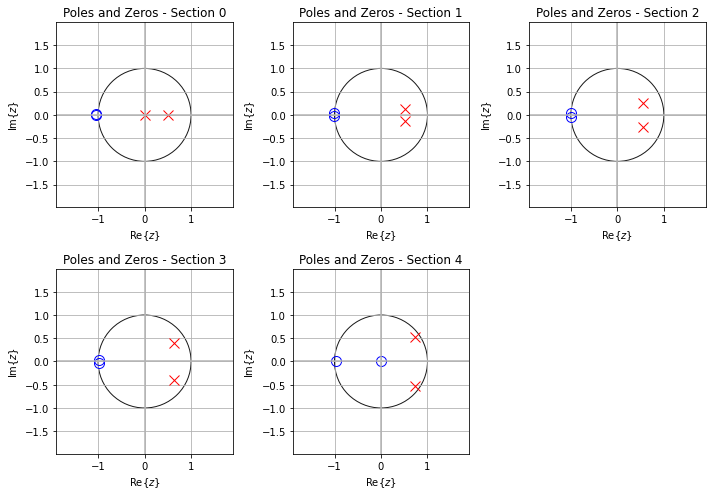

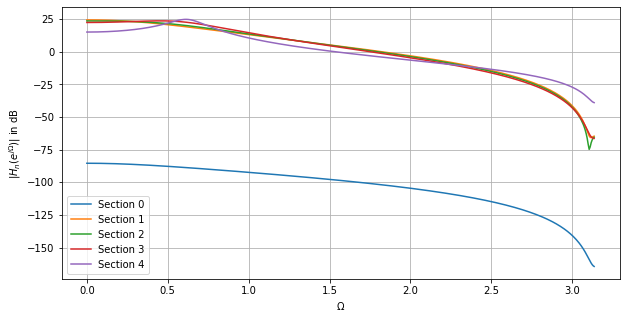

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.markers import MarkerStyle
from matplotlib.patches import Circle
import scipy.signal as sig

N = 9  # order of recursive filter

def zplane(z, p, title='Poles and Zeros'):
    "Plots zero and pole locations in the complex z-plane"
    ax = plt.gca()
    
    ax.plot(np.real(z), np.imag(z), 'bo', fillstyle='none', ms = 10)
    ax.plot(np.real(p), np.imag(p), 'rx', fillstyle='none', ms = 10)
    unit_circle = Circle((0,0), radius=1, fill=False,
                         color='black', ls='solid', alpha=0.9)
    ax.add_patch(unit_circle)
    ax.axvline(0, color='0.7')
    ax.axhline(0, color='0.7')
    
    plt.title(title)
    plt.xlabel(r'Re{$z$}')
    plt.ylabel(r'Im{$z$}')
    plt.axis('equal')
    plt.xlim((-2, 2))
    plt.ylim((-2, 2))
    plt.grid()


# design filter
b, a = sig.butter(N, 0.2)
# decomposition into SOS
sos = sig.tf2sos(b, a, pairing='nearest')


# print filter coefficients
print('Coefficients of the recursive part \n')
print(['%1.2f'%ai for ai in a])
print('\n')
print('Coefficients of the recursive part of the individual SOS \n')
print('Section \t a1 \t\t a2')
for n in range(sos.shape[0]):
    print('%d \t\t %1.5f \t %1.5f'%(n, sos[n, 4], sos[n, 5]))

# plot pole and zero locations
plt.figure(figsize=(5,5))
zplane(np.roots(b), np.roots(a), 'Poles and Zeros - Overall')

plt.figure(figsize=(10, 7))
for n in range(sos.shape[0]):  
    plt.subplot(231+n)
    zplane(np.roots(sos[n, 0:3]), np.roots(sos[n, 3:6]), title='Poles and Zeros - Section %d'%n)
plt.tight_layout()

# compute and plot frequency response of sections
plt.figure(figsize=(10,5))
for n in range(sos.shape[0]):
    Om, H = sig.freqz(sos[n, 0:3], sos[n, 3:6])
    plt.plot(Om, 20*np.log10(np.abs(H)), label=r'Section %d'%n)

plt.xlabel(r'$\Omega$')
plt.ylabel(r'$|H_n(e^{j \Omega})|$ in dB')
plt.legend()
plt.grid()

**Exercise**



*   What amplitude range is spanned by the filter coefficients?
*   What amplitude range is spanned by the SOS coefficients?

*   Change the pole/zero grouping strategy from pairing='nearest' to pairing='keep_odd'. What changes?
*   Increase the order N of the filter. What changes?





Coefficients of the recursive part 

['1.00', '-5.39', '13.38', '-19.96', '19.62', '-13.14', '5.97', '-1.78', '0.31', '-0.02']


Coefficients of the recursive part of the individual SOS 

Section 	 a1 		 a2
0 		 -0.50953 	 0.00000
1 		 -1.04232 	 0.28838
2 		 -1.11568 	 0.37905
3 		 -1.25052 	 0.54572
4 		 -1.46818 	 0.81477


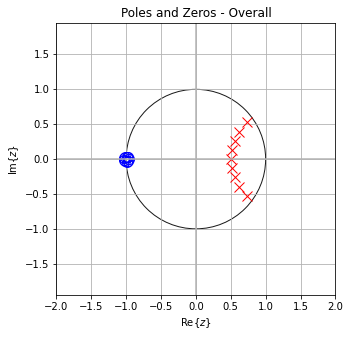

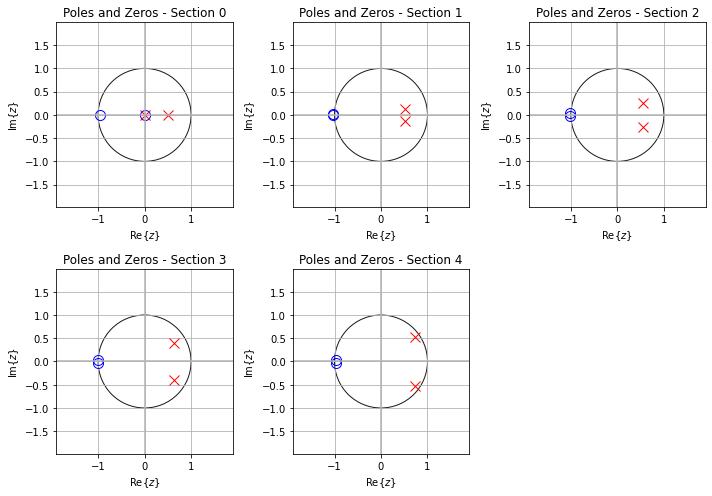

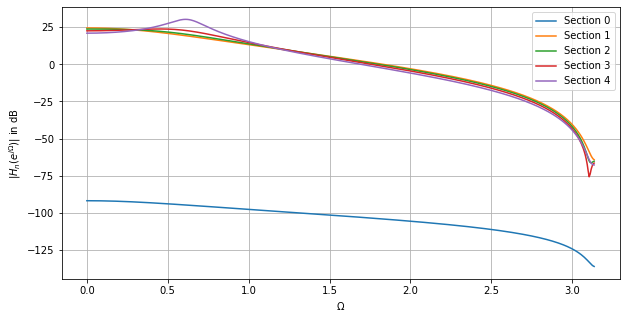

In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.markers import MarkerStyle
from matplotlib.patches import Circle
import scipy.signal as sig

N = 9  # order of recursive filter

def zplane(z, p, title='Poles and Zeros'):
    "Plots zero and pole locations in the complex z-plane"
    ax = plt.gca()
    
    ax.plot(np.real(z), np.imag(z), 'bo', fillstyle='none', ms = 10)
    ax.plot(np.real(p), np.imag(p), 'rx', fillstyle='none', ms = 10)
    unit_circle = Circle((0,0), radius=1, fill=False,
                         color='black', ls='solid', alpha=0.9)
    ax.add_patch(unit_circle)
    ax.axvline(0, color='0.7')
    ax.axhline(0, color='0.7')
    
    plt.title(title)
    plt.xlabel(r'Re{$z$}')
    plt.ylabel(r'Im{$z$}')
    plt.axis('equal')
    plt.xlim((-2, 2))
    plt.ylim((-2, 2))
    plt.grid()


# design filter
b, a = sig.butter(N, 0.2)
# decomposition into SOS
sos = sig.tf2sos(b, a, pairing='keep_odd')


# print filter coefficients
print('Coefficients of the recursive part \n')
print(['%1.2f'%ai for ai in a])
print('\n')
print('Coefficients of the recursive part of the individual SOS \n')
print('Section \t a1 \t\t a2')
for n in range(sos.shape[0]):
    print('%d \t\t %1.5f \t %1.5f'%(n, sos[n, 4], sos[n, 5]))

# plot pole and zero locations
plt.figure(figsize=(5,5))
zplane(np.roots(b), np.roots(a), 'Poles and Zeros - Overall')

plt.figure(figsize=(10, 7))
for n in range(sos.shape[0]):  
    plt.subplot(231+n)
    zplane(np.roots(sos[n, 0:3]), np.roots(sos[n, 3:6]), title='Poles and Zeros - Section %d'%n)
plt.tight_layout()

# compute and plot frequency response of sections
plt.figure(figsize=(10,5))
for n in range(sos.shape[0]):
    Om, H = sig.freqz(sos[n, 0:3], sos[n, 3:6])
    plt.plot(Om, 20*np.log10(np.abs(H)), label=r'Section %d'%n)

plt.xlabel(r'$\Omega$')
plt.ylabel(r'$|H_n(e^{j \Omega})|$ in dB')
plt.legend()
plt.grid()

**Cambiandole el orden al filtro tenemos:**

Coefficients of the recursive part 

['1.00', '-1.76', '1.18', '-0.28']


Coefficients of the recursive part of the individual SOS 

Section 	 a1 		 a2
0 		 -0.50953 	 0.00000
1 		 -1.25052 	 0.54572


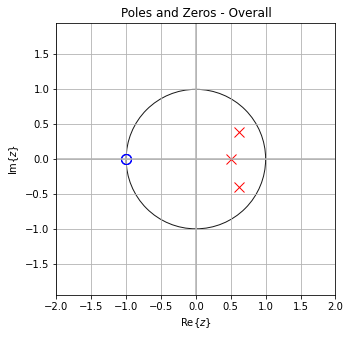

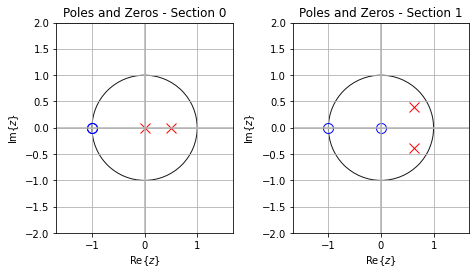

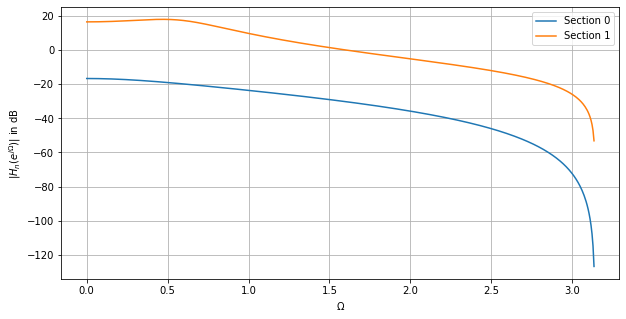

In [4]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.markers import MarkerStyle
from matplotlib.patches import Circle
import scipy.signal as sig

N = 3  # order of recursive filter

def zplane(z, p, title='Poles and Zeros'):
    "Plots zero and pole locations in the complex z-plane"
    ax = plt.gca()
    
    ax.plot(np.real(z), np.imag(z), 'bo', fillstyle='none', ms = 10)
    ax.plot(np.real(p), np.imag(p), 'rx', fillstyle='none', ms = 10)
    unit_circle = Circle((0,0), radius=1, fill=False,
                         color='black', ls='solid', alpha=0.9)
    ax.add_patch(unit_circle)
    ax.axvline(0, color='0.7')
    ax.axhline(0, color='0.7')
    
    plt.title(title)
    plt.xlabel(r'Re{$z$}')
    plt.ylabel(r'Im{$z$}')
    plt.axis('equal')
    plt.xlim((-2, 2))
    plt.ylim((-2, 2))
    plt.grid()


# design filter
b, a = sig.butter(N, 0.2)
# decomposition into SOS
sos = sig.tf2sos(b, a, pairing='nearest')


# print filter coefficients
print('Coefficients of the recursive part \n')
print(['%1.2f'%ai for ai in a])
print('\n')
print('Coefficients of the recursive part of the individual SOS \n')
print('Section \t a1 \t\t a2')
for n in range(sos.shape[0]):
    print('%d \t\t %1.5f \t %1.5f'%(n, sos[n, 4], sos[n, 5]))

# plot pole and zero locations
plt.figure(figsize=(5,5))
zplane(np.roots(b), np.roots(a), 'Poles and Zeros - Overall')

plt.figure(figsize=(10, 7))
for n in range(sos.shape[0]):  
    plt.subplot(231+n)
    zplane(np.roots(sos[n, 0:3]), np.roots(sos[n, 3:6]), title='Poles and Zeros - Section %d'%n)
plt.tight_layout()

# compute and plot frequency response of sections
plt.figure(figsize=(10,5))
for n in range(sos.shape[0]):
    Om, H = sig.freqz(sos[n, 0:3], sos[n, 3:6])
    plt.plot(Om, 20*np.log10(np.abs(H)), label=r'Section %d'%n)

plt.xlabel(r'$\Omega$')
plt.ylabel(r'$|H_n(e^{j \Omega})|$ in dB')
plt.legend()
plt.grid()

Coefficients of the recursive part 

['1.00', '-7.19', '24.34', '-51.10', '73.87', '-77.29', '59.92', '-34.63', '14.79', '-4.54', '0.95', '-0.12', '0.01']


Coefficients of the recursive part of the individual SOS 

Section 	 a1 		 a2
0 		 -1.02229 	 0.26362
1 		 -1.04860 	 0.29614
2 		 -1.10346 	 0.36396
3 		 -1.19164 	 0.47295
4 		 -1.32091 	 0.63274
5 		 -1.50274 	 0.85749


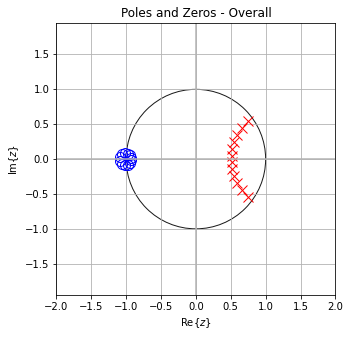

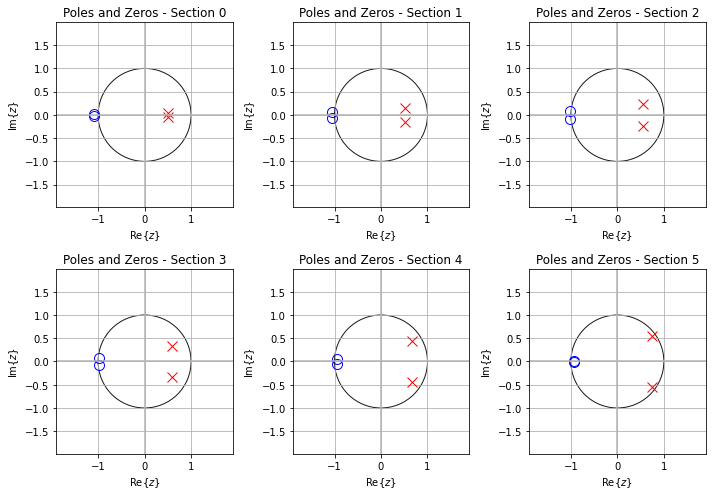

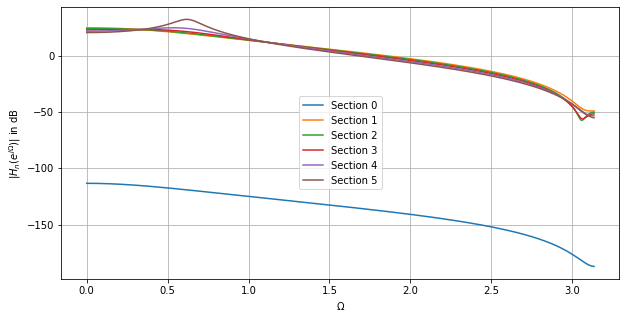

In [6]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.markers import MarkerStyle
from matplotlib.patches import Circle
import scipy.signal as sig

N = 12  # order of recursive filter

def zplane(z, p, title='Poles and Zeros'):
    "Plots zero and pole locations in the complex z-plane"
    ax = plt.gca()
    
    ax.plot(np.real(z), np.imag(z), 'bo', fillstyle='none', ms = 10)
    ax.plot(np.real(p), np.imag(p), 'rx', fillstyle='none', ms = 10)
    unit_circle = Circle((0,0), radius=1, fill=False,
                         color='black', ls='solid', alpha=0.9)
    ax.add_patch(unit_circle)
    ax.axvline(0, color='0.7')
    ax.axhline(0, color='0.7')
    
    plt.title(title)
    plt.xlabel(r'Re{$z$}')
    plt.ylabel(r'Im{$z$}')
    plt.axis('equal')
    plt.xlim((-2, 2))
    plt.ylim((-2, 2))
    plt.grid()


# design filter
b, a = sig.butter(N, 0.2)
# decomposition into SOS
sos = sig.tf2sos(b, a, pairing='nearest')


# print filter coefficients
print('Coefficients of the recursive part \n')
print(['%1.2f'%ai for ai in a])
print('\n')
print('Coefficients of the recursive part of the individual SOS \n')
print('Section \t a1 \t\t a2')
for n in range(sos.shape[0]):
    print('%d \t\t %1.5f \t %1.5f'%(n, sos[n, 4], sos[n, 5]))

# plot pole and zero locations
plt.figure(figsize=(5,5))
zplane(np.roots(b), np.roots(a), 'Poles and Zeros - Overall')

plt.figure(figsize=(10, 7))
for n in range(sos.shape[0]):  
    plt.subplot(231+n)
    zplane(np.roots(sos[n, 0:3]), np.roots(sos[n, 3:6]), title='Poles and Zeros - Section %d'%n)
plt.tight_layout()

# compute and plot frequency response of sections
plt.figure(figsize=(10,5))
for n in range(sos.shape[0]):
    Om, H = sig.freqz(sos[n, 0:3], sos[n, 3:6])
    plt.plot(Om, 20*np.log10(np.abs(H)), label=r'Section %d'%n)

plt.xlabel(r'$\Omega$')
plt.ylabel(r'$|H_n(e^{j \Omega})|$ in dB')
plt.legend()
plt.grid()

El rango de coeficientes del filtro original abarca desde -19.96 hasta 19.62.

El rango en los coeficientes del filtro SOS abarca valores comprendidos entre -1.46 hasta 0.81

Al cambiar la estrategia de agrupacion, en la seccion cero se ve que un polo coincide con un cero, y en la seccion cuatro los polos se juntan sobre el circulo unitario, haciendo que la seccion se alinie mejor con las demas secciones

Al aumentar el orden, se aprecia un pequeño aumento en los coeficientes del SOS y un aumento grande en los coeficientes del original, ademas se nota un alejamiento de las secciones en cuanto a magnitud al aumentar el orden, y un acercamiento al disminuirlo
